In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from TRSF import trsf

Path_to_samples = '/Users/rs17612/Documents/Radio_Data/SKA_Challenge_1/Sample_AGN/cutout_'
Path_to_3CRXX = '/Users/rs17612/Documents/Radio_Data/3CRR/'
# search the directory for files with name starting with cutout_
# and ending with .fits

import glob
filesnames = glob.glob(Path_to_3CRXX+'*')
filesnames_cutout = glob.glob(Path_to_samples+'*')  
filesnames

import skimage.measure as measure
def plottings(cat,ptype,color,img,name,ax,linewidth):
    
    
    label = False
    for i in range(0,len(cat)):
        row = cat.iloc[i]
        if ptype=='bbox':
            bbox = row.bbox
            if bbox != None:
                xmin = bbox[0] - 1
                xmax = bbox[2] + 1
                ymin = bbox[1] - 1
                ymax = bbox[3] + 1
                if label == False:
                    ax.plot([ymin,ymin,ymax,ymax,ymin],[xmin,xmax,xmax,xmin,xmin],color=color,label=name,linewidth=linewidth)
                    label = True
                ax.plot([ymin,ymin,ymax,ymax,ymin],[xmin,xmax,xmax,xmin,xmin],color=color,linewidth=linewidth)
        if ptype == 'point':
            ax.plot(row.y,row.x,'+',color=color)
        
        if ptype == 'polygonwith':
            polygon = row.polygon
            try:
                if label == False:
                    ax.plot(polygon[:,1],polygon[:,0],color=color,label=name,linewidth=linewidth)
                    label = True
                else:
                    ax.plot(polygon[:,1],polygon[:,0],color=color,linewidth=linewidth)  
            except:
                plottings(cat,'polygonwithout',color,img,name,ax,linewidth=linewidth)  
        if ptype == 'polygonwithout':
        # we much create the polygons from the birth and death points
            birth = row.Birth
            death = row.Death
            mask = np.zeros(img.shape)
            mask = np.logical_or(mask, np.logical_and(img <= birth, img > death))
        
            mask = get_enclosing_mask(int(row.y1),int(row.x1),mask)    
            mask = mask.astype(int)
            contour = measure.find_contours(mask)[0]

            if label == False:
                ax.plot(contour[:,1],contour[:,0],color=color,label=name,linewidth=linewidth)
                label= True
            else:
                ax.plot(contour[:,1],contour[:,0],color=color,linewidth=linewidth)   

def get_enclosing_mask(x, y, mask):
    '''
    Returns the mask of the enclosed area of the point (x,y) in the mask.
    '''
    
    # Ensure the point is inside the mask
    if not mask[y, x]:
        return None
    # Create a copy of the mask
    enclosed_mask = np.copy(mask)
    # Perform a flood fill starting from the point
    h, w = mask.shape
    stack = [(x, y)]
    while stack:
        x, y = stack.pop()
        if enclosed_mask[y, x]:
            enclosed_mask[y, x] = False
            if x > 0:
                stack.append((x - 1, y))
            if x < w - 1:
                stack.append((x + 1, y))
            if y > 0:
                stack.append((x, y - 1))
            if y < h - 1:
                stack.append((x, y + 1))
    
    return mask & (~enclosed_mask)


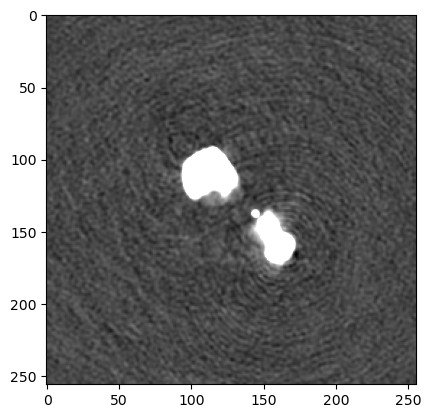

In [3]:
from astropy.io import fits
import numpy as np

# Read in the data
hdulist = fits.open(filesnames[0])
data = hdulist[0].data[0,0,:,:]

plt.imshow(data, cmap='gray',vmax=0.001)
plt.show()

/Users/rs17612/Documents/Radio_Data/3CRR/3C295
(1, 1, 256, 256)
   
###########################
 _____   ___    ___    ___ 
|_   _| | _ \  / __|  | __|
  | |   |   /  \__ \  | _| 
  |_|   |_|_\  |___/  |_|  
        
###########################
Topological Radio Source Finder.
        
-------------------
Starting TRSF
NOTICE: Image path: None
Attempting to open Image...
Calculating persistence diagrams and source properties..


Cutouts Completed: 100%|██████████| 1/1 [00:00<00:00,  1.88it/s]


TRSF finished.
Time taken: 0.5509240627288818 seconds
-------------------
/Users/rs17612/Documents/Radio_Data/3CRR/3C401
(1, 1, 256, 256)
   
###########################
 _____   ___    ___    ___ 
|_   _| | _ \  / __|  | __|
  | |   |   /  \__ \  | _| 
  |_|   |_|_\  |___/  |_|  
        
###########################
Topological Radio Source Finder.
        
-------------------
Starting TRSF
NOTICE: Image path: None
Attempting to open Image...
Calculating persistence diagrams and source properties..


Cutouts Completed: 100%|██████████| 1/1 [00:02<00:00,  2.67s/it]


TRSF finished.
Time taken: 2.718730926513672 seconds
-------------------
/Users/rs17612/Documents/Radio_Data/3CRR/3C452
(1, 1, 244, 351)
   
###########################
 _____   ___    ___    ___ 
|_   _| | _ \  / __|  | __|
  | |   |   /  \__ \  | _| 
  |_|   |_|_\  |___/  |_|  
        
###########################
Topological Radio Source Finder.
        
-------------------
Starting TRSF
NOTICE: Image path: None
Attempting to open Image...
Calculating persistence diagrams and source properties..


Cutouts Completed: 100%|██████████| 1/1 [00:01<00:00,  1.01s/it]


TRSF finished.
Time taken: 1.0186970233917236 seconds
-------------------
/Users/rs17612/Documents/Radio_Data/3CRR/3C314P1
(1, 1, 256, 256)
   
###########################
 _____   ___    ___    ___ 
|_   _| | _ \  / __|  | __|
  | |   |   /  \__ \  | _| 
  |_|   |_|_\  |___/  |_|  
        
###########################
Topological Radio Source Finder.
        
-------------------
Starting TRSF
NOTICE: Image path: None
Attempting to open Image...
Calculating persistence diagrams and source properties..


Cutouts Completed:   0%|          | 0/1 [00:00<?, ?it/s]

mad_std is 0, evaluating homology


Cutouts Completed: 100%|██████████| 1/1 [00:00<00:00,  1.14it/s]


TRSF finished.
Time taken: 0.892009973526001 seconds
-------------------
/Users/rs17612/Documents/Radio_Data/3CRR/3C76P1
(1, 1, 256, 256)
   
###########################
 _____   ___    ___    ___ 
|_   _| | _ \  / __|  | __|
  | |   |   /  \__ \  | _| 
  |_|   |_|_\  |___/  |_|  
        
###########################
Topological Radio Source Finder.
        
-------------------
Starting TRSF
NOTICE: Image path: None
Attempting to open Image...
Calculating persistence diagrams and source properties..


Cutouts Completed: 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]


TRSF finished.
Time taken: 0.46556687355041504 seconds
-------------------
/Users/rs17612/Documents/Radio_Data/3CRR/3C438
(1, 1, 256, 256)
   
###########################
 _____   ___    ___    ___ 
|_   _| | _ \  / __|  | __|
  | |   |   /  \__ \  | _| 
  |_|   |_|_\  |___/  |_|  
        
###########################
Topological Radio Source Finder.
        
-------------------
Starting TRSF
NOTICE: Image path: None
Attempting to open Image...
Calculating persistence diagrams and source properties..


Cutouts Completed: 100%|██████████| 1/1 [00:01<00:00,  1.51s/it]


TRSF finished.
Time taken: 1.5332529544830322 seconds
-------------------


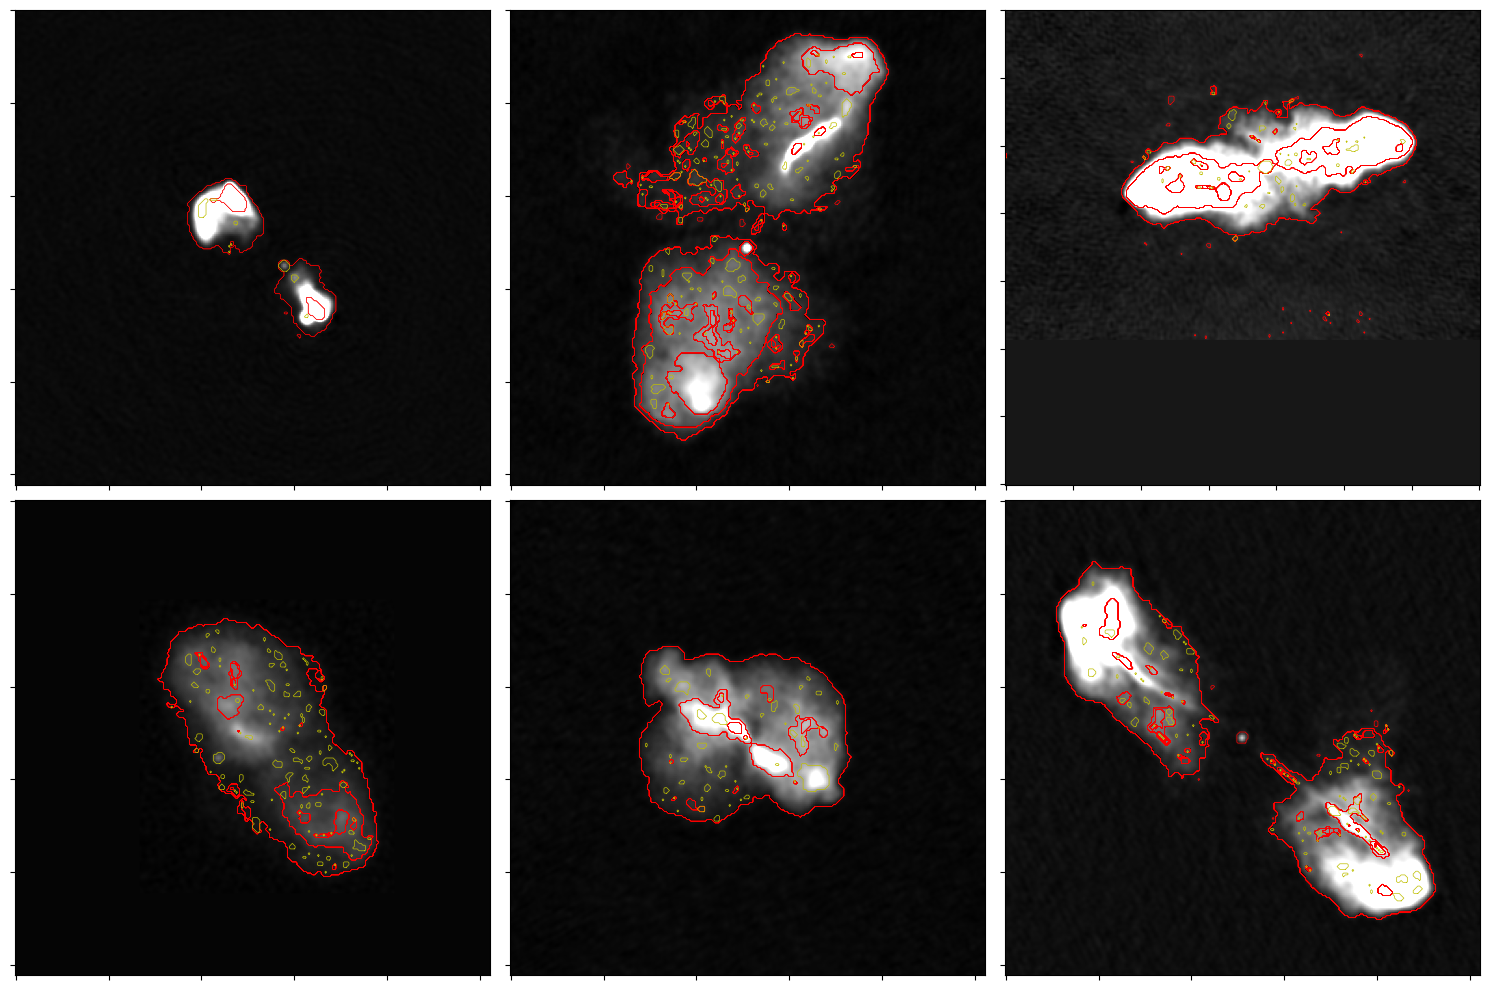

In [4]:
def trsf_3CRXX(arr):
    data = trsf(None,arrtype=True,arr=arr,plot=False)
    return data

def make_square(img):
    # make image square by adding padding
    if img.shape[0] > img.shape[1]:
        diff = img.shape[0] - img.shape[1]
        pad = np.zeros((img.shape[0],diff))
        img = np.concatenate((img,pad),axis=1)
    elif img.shape[1] > img.shape[0]:
        diff = img.shape[1] - img.shape[0]
        pad = np.zeros((diff,img.shape[1]))
        img = np.concatenate((img,pad),axis=0)
    return img



rows = 2
cols = 3
no_i_list = [6,7,8]
fid, ax = plt.subplots(rows,cols,figsize=(15,10))
i = 0
for row in range(rows):
    for col in range(cols):
        print(filesnames[i])
        hdulist = fits.open(filesnames[i])
        
        i = i + 1
        
        
        data = hdulist[0].data
        print(data.shape)
        try:
            data = data[0,0,:,:]       
        except IndexError:
            data = data[0,:,:]
        # make image square
        if data.shape[0] != data.shape[1]:
            data = make_square(data)
        data = trsf_3CRXX(data)
        catalogue = data.catalogue
        image = data.full_img

        cat0 = catalogue[catalogue['Class'] == 0]
        cat1 = catalogue[catalogue['Class'] == 1]
        cat2 = catalogue[catalogue['Class'] == 2]
        cat3 = catalogue[catalogue['Class'] == 3]

        ax[row,col].imshow(image,cmap='gray',vmax=0.01)
        plottings(cat2,'polygonwith',color='r',img=image,name='Class 2',ax=ax[row,col],linewidth=0.2)
        plottings(cat0,'polygonwithout',color='r',img=image,name='Class 0',ax=ax[row,col],linewidth=0.5)
        plottings(cat3,'polygonwithout',color='r',img=image,name='Class 3',ax=ax[row,col],linewidth=0.5)
        plottings(cat1,'polygonwithout',color='y',img=image,name='Class 1',ax=ax[row,col],linewidth=0.5)
        #ax[row,col].set_aspect('equal')
        ax[row,col].set_xticklabels([])
        ax[row,col].set_yticklabels([])
plt.tight_layout()
plt.show()

In [5]:
def trsf_func(data_path,smoothing,smooth_param):
    data = trsf(data_path,gaussian_fitting=False,region_expansion=True,cutup_img=False,sigma=5,smoothing=smoothing,smooth_param=smooth_param,plot=False)
    return data

In [6]:
def crop_padded_area(image):
    """
    Crop the padded area of zeros from an image.
    
    Parameters:
    - image: numpy.ndarray
        Input image with padding of zeros.
        
    Returns:
    - cropped_image: numpy.ndarray
        Cropped image without the padded area of zeros.
    """
    # Find non-zero rows and columns
    non_zero_rows, non_zero_cols = np.nonzero(image)
    
    # Calculate bounding box
    min_row = min(non_zero_rows)
    max_row = max(non_zero_rows)
    min_col = min(non_zero_cols)
    max_col = max(non_zero_cols)
    
    # Crop the image
    cropped_image = image[min_row:max_row+1, min_col:max_col+1]
    
    return cropped_image






0
   
###########################
 _____   ___    ___    ___ 
|_   _| | _ \  / __|  | __|
  | |   |   /  \__ \  | _| 
  |_|   |_|_\  |___/  |_|  
        
###########################
Topological Radio Source Finder.
        
-------------------
Starting TRSF
NOTICE: Image path: /Users/rs17612/Documents/Radio_Data/SKA_Challenge_1/Sample_AGN/cutout_17092.1992.fits
Attempting to open Image...
Error ValueError: data is not 3D!!
Error ValueError: data is not 3D!!
NOTICE: Input Image Size (64, 97)
NOTICE: Image Size with reduced padding (64, 97)
NOTICE: Image opened and cut into 1 pieces.
Calculating persistence diagrams and source properties..


Cutouts Completed: 100%|██████████| 1/1 [00:00<00:00,  6.88it/s]

TRSF finished.
Time taken: 0.1664741039276123 seconds
-------------------


1
   
###########################
 _____   ___    ___    ___ 
|_   _| | _ \  / __|  | __|
  | |   |   /  \__ \  | _| 
  |_|   |_|_\  |___/  |_|  
        
###########################
Topological Radio Source Finder.
        
-------------------
Starting TRSF
NOTICE: Image path: /Users/rs17612/Documents/Radio_Data/SKA_Challenge_1/Sample_AGN/cutout_21079.5137.fits
Attempting to open Image...
Error ValueError: data is not 3D!!
Error ValueError: data is not 3D!!
NOTICE: Input Image Size (157, 181)
NOTICE: Image Size with reduced padding (157, 181)
NOTICE: Image opened and cut into 1 pieces.
Calculating persistence diagrams and source properties..


Cutouts Completed: 100%|██████████| 1/1 [00:00<00:00,  1.45it/s]


TRSF finished.
Time taken: 0.7230861186981201 seconds
-------------------
2
   
###########################
 _____   ___    ___    ___ 
|_   _| | _ \  / __|  | __|
  | |   |   /  \__ \  | _| 
  |_|   |_|_\  |___/  |_|  
        
###########################
Topological Radio Source Finder.
        
-------------------
Starting TRSF
NOTICE: Image path: /Users/rs17612/Documents/Radio_Data/SKA_Challenge_1/Sample_AGN/cutout_16888.7246.fits
Attempting to open Image...
Error ValueError: data is not 3D!!
Error ValueError: data is not 3D!!
NOTICE: Input Image Size (127, 167)
NOTICE: Image Size with reduced padding (127, 167)
NOTICE: Image opened and cut into 1 pieces.
Calculating persistence diagrams and source properties..


Cutouts Completed: 100%|██████████| 1/1 [00:00<00:00,  4.31it/s]


TRSF finished.
Time taken: 0.26100683212280273 seconds
-------------------
3
   
###########################
 _____   ___    ___    ___ 
|_   _| | _ \  / __|  | __|
  | |   |   /  \__ \  | _| 
  |_|   |_|_\  |___/  |_|  
        
###########################
Topological Radio Source Finder.
        
-------------------
Starting TRSF
NOTICE: Image path: /Users/rs17612/Documents/Radio_Data/SKA_Challenge_1/Sample_AGN/cutout_16568.5898.fits
Attempting to open Image...
Error ValueError: data is not 3D!!
Error ValueError: data is not 3D!!
NOTICE: Input Image Size (165, 125)
NOTICE: Image Size with reduced padding (165, 125)
NOTICE: Image opened and cut into 1 pieces.
Calculating persistence diagrams and source properties..


Cutouts Completed: 100%|██████████| 1/1 [00:00<00:00,  1.55it/s]


TRSF finished.
Time taken: 0.674544095993042 seconds
-------------------
4
   
###########################
 _____   ___    ___    ___ 
|_   _| | _ \  / __|  | __|
  | |   |   /  \__ \  | _| 
  |_|   |_|_\  |___/  |_|  
        
###########################
Topological Radio Source Finder.
        
-------------------
Starting TRSF
NOTICE: Image path: /Users/rs17612/Documents/Radio_Data/SKA_Challenge_1/Sample_AGN/cutout_17068.3809.fits
Attempting to open Image...
Error ValueError: data is not 3D!!
Error ValueError: data is not 3D!!
NOTICE: Input Image Size (139, 151)
NOTICE: Image Size with reduced padding (139, 151)
NOTICE: Image opened and cut into 1 pieces.
Calculating persistence diagrams and source properties..


Cutouts Completed: 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]


TRSF finished.
Time taken: 0.48283910751342773 seconds
-------------------
6
   
###########################
 _____   ___    ___    ___ 
|_   _| | _ \  / __|  | __|
  | |   |   /  \__ \  | _| 
  |_|   |_|_\  |___/  |_|  
        
###########################
Topological Radio Source Finder.
        
-------------------
Starting TRSF
NOTICE: Image path: /Users/rs17612/Documents/Radio_Data/SKA_Challenge_1/Sample_AGN/cutout_21516.918.fits
Attempting to open Image...
Error ValueError: data is not 3D!!
Error ValueError: data is not 3D!!
NOTICE: Input Image Size (208, 182)
NOTICE: Image Size with reduced padding (208, 182)
NOTICE: Image opened and cut into 1 pieces.
Calculating persistence diagrams and source properties..


Cutouts Completed: 100%|██████████| 1/1 [00:00<00:00,  1.12it/s]


TRSF finished.
Time taken: 0.9285092353820801 seconds
-------------------
7
   
###########################
 _____   ___    ___    ___ 
|_   _| | _ \  / __|  | __|
  | |   |   /  \__ \  | _| 
  |_|   |_|_\  |___/  |_|  
        
###########################
Topological Radio Source Finder.
        
-------------------
Starting TRSF
NOTICE: Image path: /Users/rs17612/Documents/Radio_Data/SKA_Challenge_1/Sample_AGN/cutout_15824.7998.fits
Attempting to open Image...
Error ValueError: data is not 3D!!
Error ValueError: data is not 3D!!
NOTICE: Input Image Size (222, 176)
NOTICE: Image Size with reduced padding (222, 176)
NOTICE: Image opened and cut into 1 pieces.
Calculating persistence diagrams and source properties..


Cutouts Completed: 100%|██████████| 1/1 [00:02<00:00,  2.77s/it]


TRSF finished.
Time taken: 2.8061089515686035 seconds
-------------------
8
   
###########################
 _____   ___    ___    ___ 
|_   _| | _ \  / __|  | __|
  | |   |   /  \__ \  | _| 
  |_|   |_|_\  |___/  |_|  
        
###########################
Topological Radio Source Finder.
        
-------------------
Starting TRSF
NOTICE: Image path: /Users/rs17612/Documents/Radio_Data/SKA_Challenge_1/Sample_AGN/cutout_16665.1992.fits
Attempting to open Image...
Error ValueError: data is not 3D!!
Error ValueError: data is not 3D!!
NOTICE: Input Image Size (150, 173)
NOTICE: Image Size with reduced padding (150, 173)
NOTICE: Image opened and cut into 1 pieces.
Calculating persistence diagrams and source properties..


Cutouts Completed: 100%|██████████| 1/1 [00:01<00:00,  1.66s/it]


TRSF finished.
Time taken: 1.7033741474151611 seconds
-------------------
9
   
###########################
 _____   ___    ___    ___ 
|_   _| | _ \  / __|  | __|
  | |   |   /  \__ \  | _| 
  |_|   |_|_\  |___/  |_|  
        
###########################
Topological Radio Source Finder.
        
-------------------
Starting TRSF
NOTICE: Image path: /Users/rs17612/Documents/Radio_Data/SKA_Challenge_1/Sample_AGN/cutout_17092.2402.fits
Attempting to open Image...
Error ValueError: data is not 3D!!
Error ValueError: data is not 3D!!
NOTICE: Input Image Size (65, 60)
NOTICE: Image Size with reduced padding (65, 60)
NOTICE: Image opened and cut into 1 pieces.
Calculating persistence diagrams and source properties..


Cutouts Completed: 100%|██████████| 1/1 [00:00<00:00, 16.35it/s]

TRSF finished.
Time taken: 0.08415699005126953 seconds
-------------------


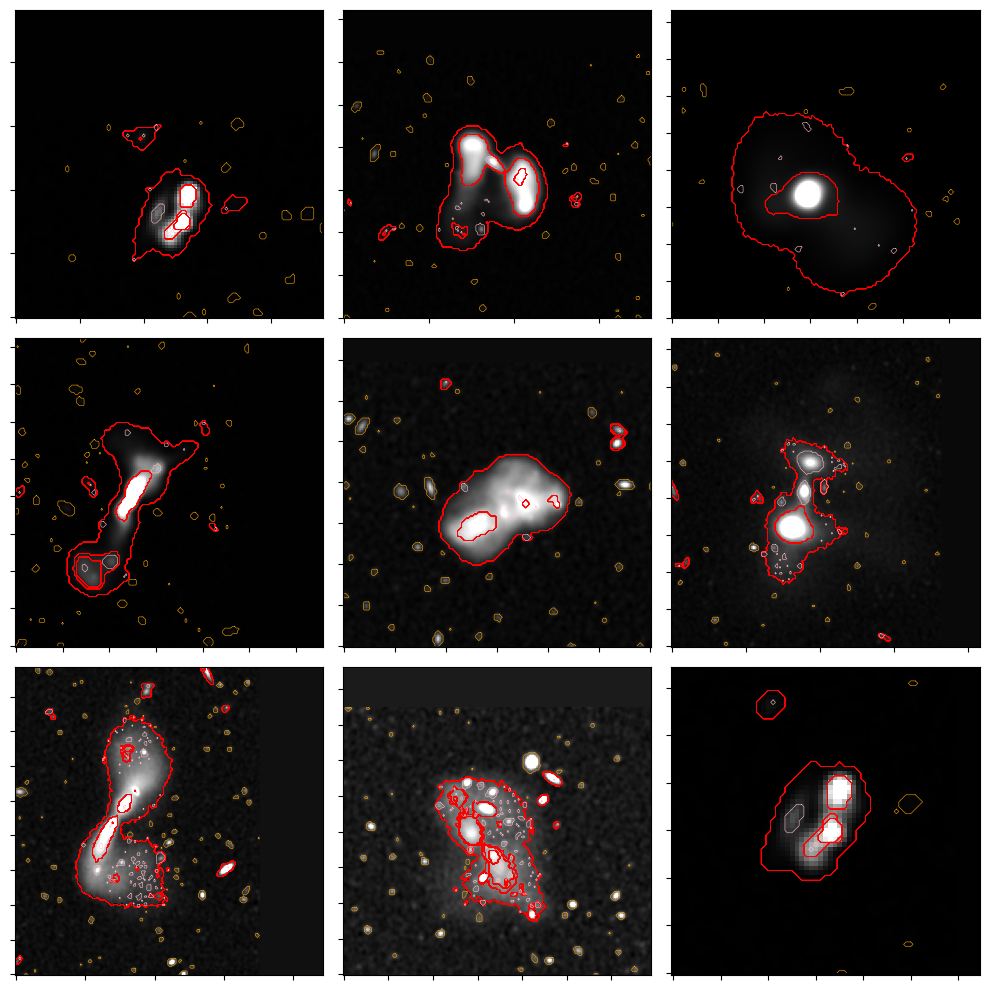

In [7]:
cols = 3
rows = 3
fig, ax = plt.subplots(cols,rows,figsize=(10,10))
i = 0
avoid_list = [5,12,13]
for row in range(cols):
    for col in range(rows):
        
        if i in avoid_list:
            i = i + 1
        print(i)
        data1 = trsf_func(filesnames_cutout[i],False,1)
        catalogue = data1.catalogue
        image = data1.full_img
        # drop any pxels that are 0

        #image = crop_padded_area(image)

        #catalogue['Class'][catalogue['Class'] == 2] = 7
        catalogue['Class'][np.isnan(catalogue['Class'])] = 2
        cat0 = catalogue[catalogue['Class'] == 0]
        cat1 = catalogue[catalogue['Class'] == 1]
        cat2 = catalogue[catalogue['Class'] == 2]
        cat3 = catalogue[catalogue['Class'] == 3]

        ax[row,col].imshow(image,origin='lower',cmap='gray',vmax=np.nanpercentile(image,99.5))
        plottings(cat2,'polygonwith',color='r',img=image,name='Class 2',ax=ax[row,col],linewidth=0.4)
        plottings(cat0,'polygonwithout',color='orange',img=image,name='Class 0',ax=ax[row,col],linewidth=0.4)
        plottings(cat3,'polygonwithout',color='purple',img=image,name='Class 3',ax=ax[row,col],linewidth=0.4)
        plottings(cat1,'polygonwithout',color='pink',img=image,name='Class 1',ax=ax[row,col],linewidth=0.4)
        ax[row,col].set_xticklabels([])
        ax[row,col].set_yticklabels([])
        i = i + 1
plt.tight_layout()
plt.show()